In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests, math, datetime, time
import os
import json
import dateutil
from dateutil.relativedelta import relativedelta
import csv
import pprint

In [44]:
def parse_books(book_list, date):
    books = []
    for book in book_list['results']['books']:
        dic = {}
        dic['title'] = book['title']
        dic['author'] = book['author']
        dic['price'] = book['price']
        dic['publisher'] = book['publisher']
        dic['isbn'] = book['primary_isbn10']
        dic['contributor'] = book['contributor']
        dic['date'] = date  
        dic['rank'] = book['rank']
        dic['rank_last_week'] = book['rank_last_week']
        dic['weeks_on_list'] = book['weeks_on_list']      
        books.append(dic)
    return(books) 

In [45]:
#API KEYS
API_KEY = "yAZ1u53B2xG9k8zWc6sIjYoaC8sYibH2"

#PARAMETERS
LIST = "/Combined%20Print%20and%20E-Book%20Fiction"

BOOKS_ROOT = "https://api.nytimes.com/svc/books/v3/lists/"

In [50]:
def get_data():
    bestsellers = []
    num_days_to_get = 365 #you can use up to 1000 api calls a day so max=1000
    total = 0
    
    #create a directory to save data in csv files
    if not os.path.exists('books'):
        os.mkdir('books')
    
    for i in range(0,num_days_to_get):
        day = datetime.datetime.now() - datetime.timedelta(days=i)  
        date = str(day.date())
        print('Dowloading bestseller books from....'+ date)
        
        #send api request
        url = BOOKS_ROOT+date+LIST+'.json?api-key='+API_KEY
        #send api request
        response = requests.get(url)
        time.sleep(6)
        
        if (response.status_code == 200):
            results = response.json()
            books = parse_books(results, date)
            bestsellers.extend(books)
            df = pd.DataFrame(bestsellers) 
            total += len(df)
            df.to_csv('books/books.csv', index=False)
    print('Number of books collected: ' + str(total))


In [51]:
dataset = get_data()

Dowloading bestseller books from....2022-12-20


KeyboardInterrupt: 

In [54]:
joblib.dump(dataset ,r'R:\Projects\NYT\models\apiCall.sav')

NameError: name 'dataset' is not defined

In [2]:
#read the csv file
df = pd.read_csv('books/books.csv')
df

,title,author,price,publisher,isbn,contributor,date,rank,rank_last_week,weeks_on_list
0,A WORLD OF CURIOSITIES,Louise Penny,0.0,Minotaur,1250145317,by Louise Penny,2022-12-18,1,0,1
1,IT STARTS WITH US,Colleen Hoover,0.0,Atria,1668001225,by Colleen Hoover,2022-12-18,2,1,7
2,IT ENDS WITH US,Colleen Hoover,0.0,Atria,1501110365,by Colleen Hoover,2022-12-18,3,3,77
3,VERITY,Colleen Hoover,0.0,Grand Central,1538724731,by Colleen Hoover,2022-12-18,4,4,52
4,THE BOYS FROM BILOXI,John Grisham,0.0,Doubleday,0385548923,by John Grisham,2022-12-18,5,6,7
...,...,...,...,...,...,...,...,...,...,...
5470,THE DARK HOURS,Michael Connelly,0.0,"Little, Brown",0316485640,by Michael Connelly,2021-12-19,11,11,4
5471,THE SEVEN HUSBANDS OF EVELYN HUGO,Taylor Jenkins Reid,0.0,Washington Square/Atria,1501161938,by Taylor Jenkins Reid,2021-12-19,12,13,23
5472,MERCY,David Baldacci,0.0,Grand Central,153871972X,by David Baldacci,2021-12-19,13,9,3
5473,THE BECOMING,Nora Roberts,0.0,St. Martin's,125027270X,by Nora Roberts,2021-12-19,14,2,2


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5475 non-null   object 
 1   author          5475 non-null   object 
 2   price           5475 non-null   float64
 3   publisher       5475 non-null   object 
 4   isbn            5475 non-null   object 
 5   contributor     5475 non-null   object 
 6   date            5475 non-null   object 
 7   rank            5475 non-null   int64  
 8   rank_last_week  5475 non-null   int64  
 9   weeks_on_list   5475 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 427.9+ KB


In [4]:
df.shape

(5475, 10)

In [5]:
df.dtypes

title              object
author             object
price             float64
publisher          object
isbn               object
contributor        object
date               object
rank                int64
rank_last_week      int64
weeks_on_list       int64
dtype: object

## Exploratory Data Analysis

In [5]:
import dtale
import klib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
dtale.show(df)

### Categorical Data Distribution

GridSpec(6, 6)

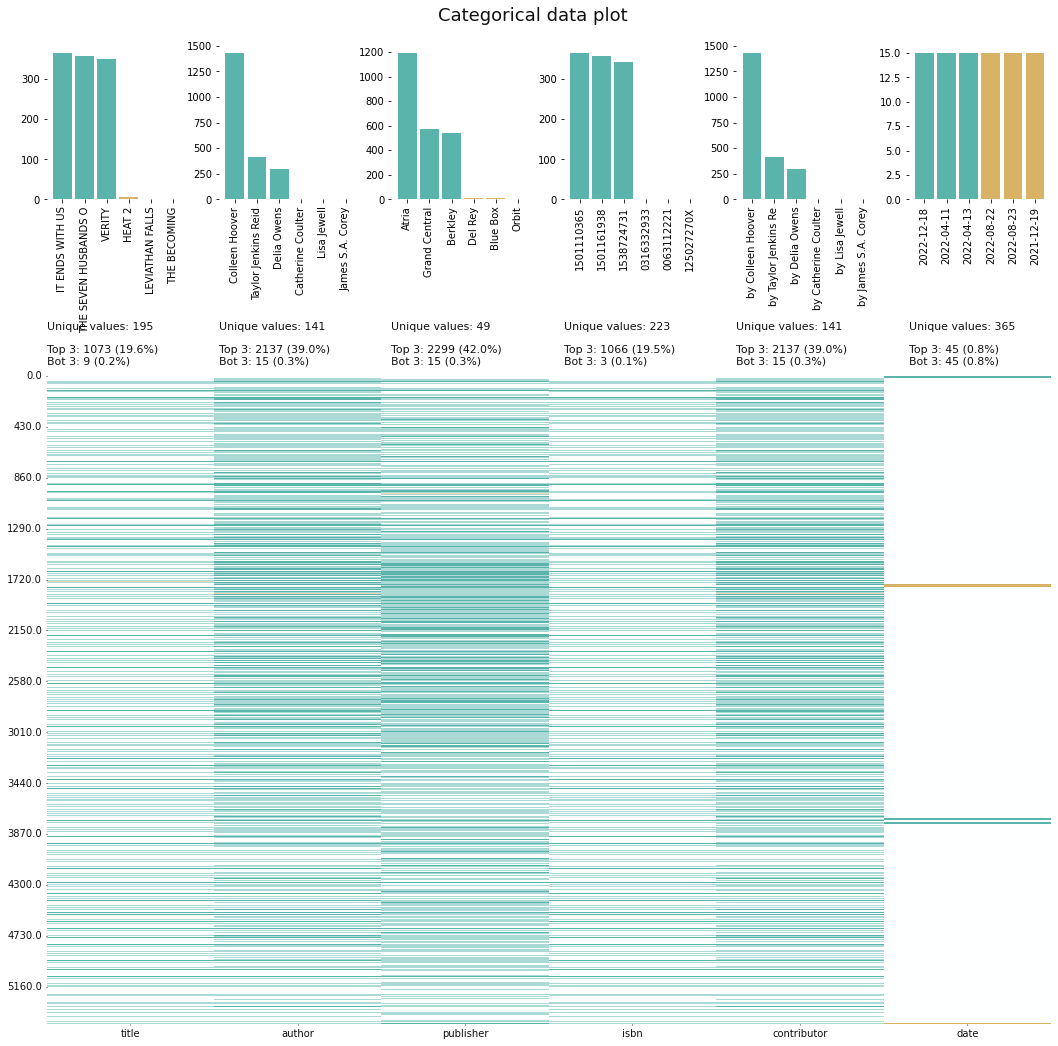

In [7]:
klib.cat_plot(df)

### Numeric Data Distribution

<AxesSubplot: xlabel='weeks_on_list', ylabel='Density'>

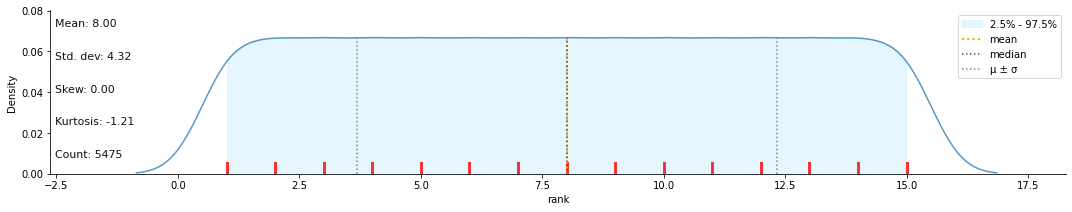

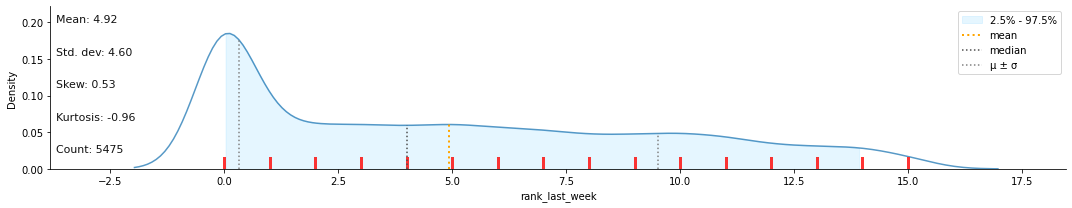

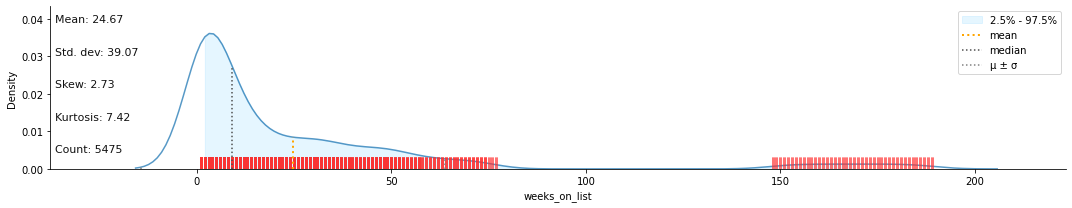

In [8]:
klib.dist_plot(df)

### Corelation

<AxesSubplot: >

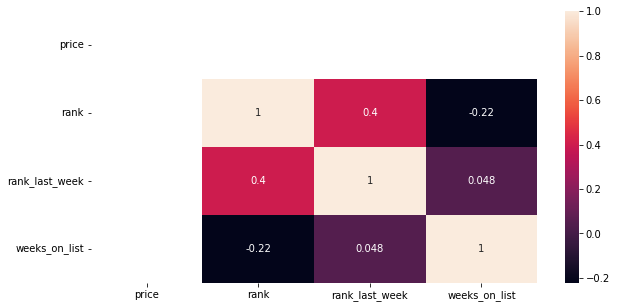

In [9]:
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(), annot = True)

## Remove Outliers

<AxesSubplot: xlabel='weeks_on_list'>

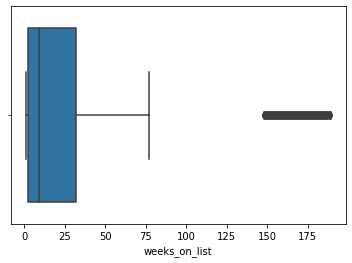

In [10]:
sns.boxplot(x=df['weeks_on_list'])

## Handle Missing Values

In [11]:
df.isnull().sum()

title             0
author            0
price             0
publisher         0
isbn              0
contributor       0
date              0
rank              0
rank_last_week    0
weeks_on_list     0
dtype: int64

## Dimensionality Reduction and Feature Selection

In [6]:
df.drop(['price','isbn','date'], axis = 1, inplace = True)

In [7]:
df.head()

,title,author,publisher,contributor,rank,rank_last_week,weeks_on_list
0,A WORLD OF CURIOSITIES,Louise Penny,Minotaur,by Louise Penny,1,0,1
1,IT STARTS WITH US,Colleen Hoover,Atria,by Colleen Hoover,2,1,7
2,IT ENDS WITH US,Colleen Hoover,Atria,by Colleen Hoover,3,3,77
3,VERITY,Colleen Hoover,Grand Central,by Colleen Hoover,4,4,52
4,THE BOYS FROM BILOXI,John Grisham,Doubleday,by John Grisham,5,6,7


## Data Cleaning

In [8]:
df.rename(columns={'rank':'ranking'}, inplace=True)
df.head()

,title,author,publisher,contributor,ranking,rank_last_week,weeks_on_list
0,A WORLD OF CURIOSITIES,Louise Penny,Minotaur,by Louise Penny,1,0,1
1,IT STARTS WITH US,Colleen Hoover,Atria,by Colleen Hoover,2,1,7
2,IT ENDS WITH US,Colleen Hoover,Atria,by Colleen Hoover,3,3,77
3,VERITY,Colleen Hoover,Grand Central,by Colleen Hoover,4,4,52
4,THE BOYS FROM BILOXI,John Grisham,Doubleday,by John Grisham,5,6,7


In [9]:
df = klib.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           5475 non-null   category
 1   author          5475 non-null   category
 2   publisher       5475 non-null   category
 3   contributor     5475 non-null   category
 4   ranking         5475 non-null   int8    
 5   rank_last_week  5475 non-null   int8    
 6   weeks_on_list   5475 non-null   int16   
dtypes: category(4), int16(1), int8(2)
memory usage: 76.3 KB


## Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['title'] = le.fit_transform(df['title'])
df['author'] = le.fit_transform(df['author'])
df['publisher'] = le.fit_transform(df['publisher'])
df['contributor'] = le.fit_transform(df['contributor'])

In [12]:
df.head()

,title,author,publisher,contributor,ranking,rank_last_week,weeks_on_list
0,6,102,27,102,1,0,1
1,69,26,2,26,2,1,7
2,68,26,2,26,3,3,77
3,188,26,19,26,4,4,52
4,127,85,14,85,5,6,7


## Assign Target Variables

In [13]:
#X is independent data variables
X = df.iloc[:, :-1].values
X

array([[  6, 102,  27, 102,   1,   0],
       [ 69,  26,   2,  26,   2,   1],
       [ 68,  26,   2,  26,   3,   3],
       ...,
       [ 84,  31,  19,  31,  13,   9],
       [124, 117,  42, 117,  14,   2],
       [ 30,   9,  38,   9,  15,   0]], dtype=int32)

In [14]:
#Y is our dependent target variable
Y = df.iloc[:, -1].values
Y

array([ 1,  7, 77, ...,  3,  2,  8], dtype=int16)

## Split Train and Testing Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train and test split data
#Split ratio =80:20. The 30% testing dataset is represented by 0.2.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [17]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of testing label:', Y_test.shape)

Shape of training feature: (4380, 6)
Shape of testing feature: (1095, 6)
Shape of training label: (4380,)
Shape of testing label: (1095,)


## Standarize Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
#learn how data is distributed in X_train
X_train_sc = sc.fit_transform(X_train)
X_train_sc

array([[ 0.69890967,  1.34322713, -0.90002147,  1.34322713,  0.69244284,
        -1.06600168],
       [ 0.85024982,  1.86353508,  1.83483068,  1.86353508, -0.46259549,
         0.45970141],
       [-0.47818034, -0.78530539, -1.09536805, -0.78530539,  0.23042751,
         0.45970141],
       ...,
       [-0.96583192, -0.73800467,  1.70459963, -0.73800467,  0.92345051,
        -1.06600168],
       [ 1.25382353, -0.64340322,  0.98832883, -0.64340322, -1.15561848,
        -0.8480441 ],
       [ 0.66527853, -1.30561334, -0.76979041, -1.30561334,  0.46143517,
         0.67765899]])

In [21]:
#transform the data
X_test_sc = sc.transform(X_test)
X_test_sc

array([[-0.52862705,  0.91752063, -0.44421278,  0.91752063, -1.38662615,
        -1.06600168],
       [ 0.66527853, -1.30561334, -0.76979041, -1.30561334,  0.23042751,
         1.76744691],
       [ 0.85024982,  1.86353508,  1.83483068,  1.86353508,  1.38546584,
         1.11357416],
       ...,
       [-0.83130734, -0.78530539, -1.09536805, -0.78530539, -1.15561848,
        -0.63008651],
       [ 1.16974568, -0.78530539, -1.09536805, -0.78530539, -0.69360315,
         0.24174382],
       [ 0.85024982,  1.86353508,  1.83483068,  1.86353508,  0.92345051,
         1.54948932]])

In [41]:
import joblib

In [42]:
joblib.dump(sc,r'R:\Projects\NYT\models\sc.sav')

['R:\\Projects\\NYT\\models\\sc.sav']

## Model Building 

In [22]:
from sklearn.linear_model import LogisticRegression
#initiazlize the instance of the logistic regression
lm=LogisticRegression()

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, accuracy_score

In [23]:
#call the fit module and train the model
lm.fit(X_train_sc,Y_train)

LogisticRegression()

In [29]:
#predict new output values, based on the test features (X_train)
Y_pred_lm = lm.predict(X_test_sc)
Y_pred_lm

array([ 1, 15,  2, ...,  2, 13,  3], dtype=int16)

In [39]:
print(r2_score(Y_test,Y_pred_lm))
print(mean_absolute_error(Y_test,Y_pred_lm))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lm)))
print(accuracy_score(Y_test,Y_pred_lm))

-0.04549554972960412
20.21461187214612
39.87266261167283
0.26301369863013696


### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()

In [33]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [36]:
Y_pred_rf = rf.predict(X_test)

In [37]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.9806174706499146
1.9785996126534733
5.428994088504918


In [43]:
joblib.dump(rf,r'R:\Projects\NYT\models\randomForest.sav')

['R:\\Projects\\NYT\\models\\randomForest.sav']